# Table of Contents
* [Introduction](#Description)
* [Import Libraries](#Imports)
* [Data Preparation](#Data-Preparation)
    * [Exploratory Data Analysis](#Exploratory-Data-Analysis)
        * [Customer Churn Distribution](#Customer-Churn-Distribution)
        * [Distribution By State](#Distribution-By-State)
        * [Distribution By Area Code](#Distribution-By-Area-Code)
        * [Distribution By State International Plan](#Distribution-By-International-Plan)
        * [Numerical Data Distribution](#Numerical-Data-Distribution)
    * [Handling Outliers](#Handling-Outliers)
    * [Feature Encoding](#Feature-Encoding)
    * [Dimensionality Reduction](#Dimensionality-Reduction)
    * [Categorical Encoding](#Categorical-Encoding)
    * [Concatenate Numerical and Encoded columns](#Concatenate-Numerical-and-Encoded-Columns)
* [Model Selection](#Model-Selection)
    * [Train/Validation/Test Split](#Train/Validation/Test-Split)
    * [Scale and Smote](#Scale-and-Smote)
    * [Hyperparameter Tuning](#Hyperparameter-Tuning)
    * [Evaluation Helpers](#Evaluation-Helpers)
* [Model Evaluation](#Model-Evaluation)
    * [Evaluate All Tuned Models](#Evaluate-All-Tuned-Models)
    * [Results Table](#Results-Table)
    * [Compare ROC Curves Side-by-side](#Compare-ROC-Curves-Side-by-side)
* [Prediction On Test Data](#Prediction-On-Test-Data)
    * [Data Preparation of Test Data](#Data-Preparation-of-Test-Data)
    * [Dimensionality Reduction of Test Data](#Dimensionality-Reduction-of-Test-Data)
    * [Categorical Encoding of Test Data](#Categorical-Encoding-of-Test-Data)
    * [Concatenate Numerical and Encoded Columns of Test Data](#Concatenate-Numerical-and-Encoded-Columns-of-Test-Data)
    * [Make Predictions Using the Best Performing Model](#Make-Predictions-Using-the-Best-Performing-Model)
    * [Create Submission File](#Create-Submission-File)
    * [Distribution of Predicted Customer Churn](#Distribution-of-Predicted-Customer-Churn)

# <center> Customer Churn Prediction</center>

# Introduction

Customer churn, also known as customer attrition or customer turnover, is the rate at which customers 
stop using a business's products or services over a specific period. It's essentially the loss of existing 
customers, and tracking this metric is crucial for understanding customer satisfaction, loyalty, and overall business health.

## Objective
This project focuses on utilising available data to identify customers who are at risk of cancelling their subscription. Knowing about potential churn allows businesses to proactively take steps to retain customers before they leave, such as implementing targeted retention strategies, personalised offers, or enhancing customer service. Churn prediction helps businesses optimise resource allocation by focusing efforts on at-risk customers, potentially increasing revenue and improving customer satisfaction

## Metric
For this project, the performance of models trained to make predictions will be based on the test Accuracy criterion:

$$
\text{Accuracy = } \frac{\text{Number of correct predictions}}{\text{Number of total test sample}}
$$

# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import kaggle
import zipfile

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix,
    roc_curve, auc
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE



In [7]:
!kaggle competitions download -c customer-churn-prediction-2020


  0%|          | 0.00/154k [00:00<?, ?B/s]
100%|##########| 154k/154k [00:00<00:00, 31.9MB/s]


In [9]:
z = zipfile.ZipFile('customer-churn-prediction-2020.zip', mode='r')
z.extractall()

# Data Preparation

In [12]:
df = pd.read_csv('train.csv')

In [13]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [17]:
df.shape

(4250, 20)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [19]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [20]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

## Customer Churn Distribution

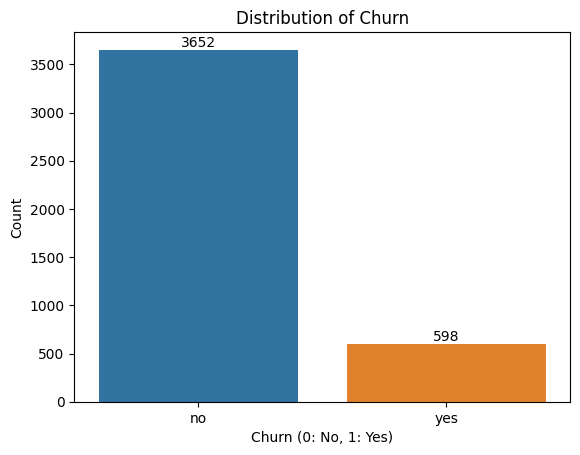

In [22]:
ax = sns.countplot(x='churn', hue='churn', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Churn')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

## Distribution By State

In [23]:
state = df['state'].value_counts()
state

state
WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: count, dtype: int64

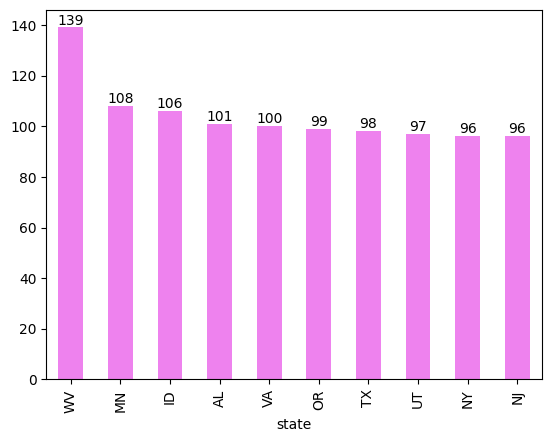

In [24]:
# Numerical Distribution of First 10 States
ax = state[:10].plot(kind='bar', color='violet')
ax.bar_label(ax.containers[0], fontsize=10);

## Distribution By Area Code

In [25]:
area_code = df['area_code'].value_counts()
area_code

area_code
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: count, dtype: int64

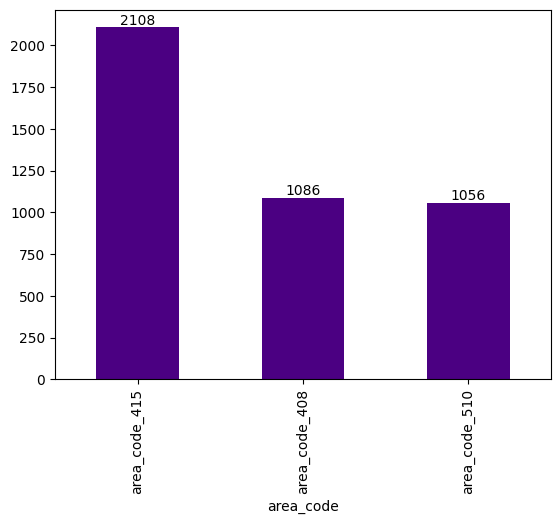

In [26]:
ax = area_code.plot(kind='bar', color='indigo')
ax.bar_label(ax.containers[0], fontsize=10);

## Distribution By International Plan

In [27]:
international_plan = df['international_plan'].value_counts()
international_plan

international_plan
no     3854
yes     396
Name: count, dtype: int64

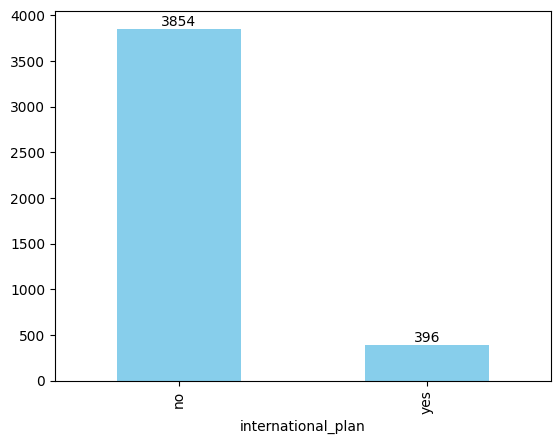

In [28]:
ax = international_plan.plot(kind='bar', color='skyblue')
ax.bar_label(ax.containers[0], fontsize=10);

## Numerical Data Distribution

In [29]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [30]:
train_num = df.select_dtypes(include = ['float64', 'int64'])
train_num.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


array([[<Axes: title={'center': 'account_length'}>,
        <Axes: title={'center': 'number_vmail_messages'}>,
        <Axes: title={'center': 'total_day_minutes'}>,
        <Axes: title={'center': 'total_day_calls'}>],
       [<Axes: title={'center': 'total_day_charge'}>,
        <Axes: title={'center': 'total_eve_minutes'}>,
        <Axes: title={'center': 'total_eve_calls'}>,
        <Axes: title={'center': 'total_eve_charge'}>],
       [<Axes: title={'center': 'total_night_minutes'}>,
        <Axes: title={'center': 'total_night_calls'}>,
        <Axes: title={'center': 'total_night_charge'}>,
        <Axes: title={'center': 'total_intl_minutes'}>],
       [<Axes: title={'center': 'total_intl_calls'}>,
        <Axes: title={'center': 'total_intl_charge'}>,
        <Axes: title={'center': 'number_customer_service_calls'}>,
        <Axes: >]], dtype=object)

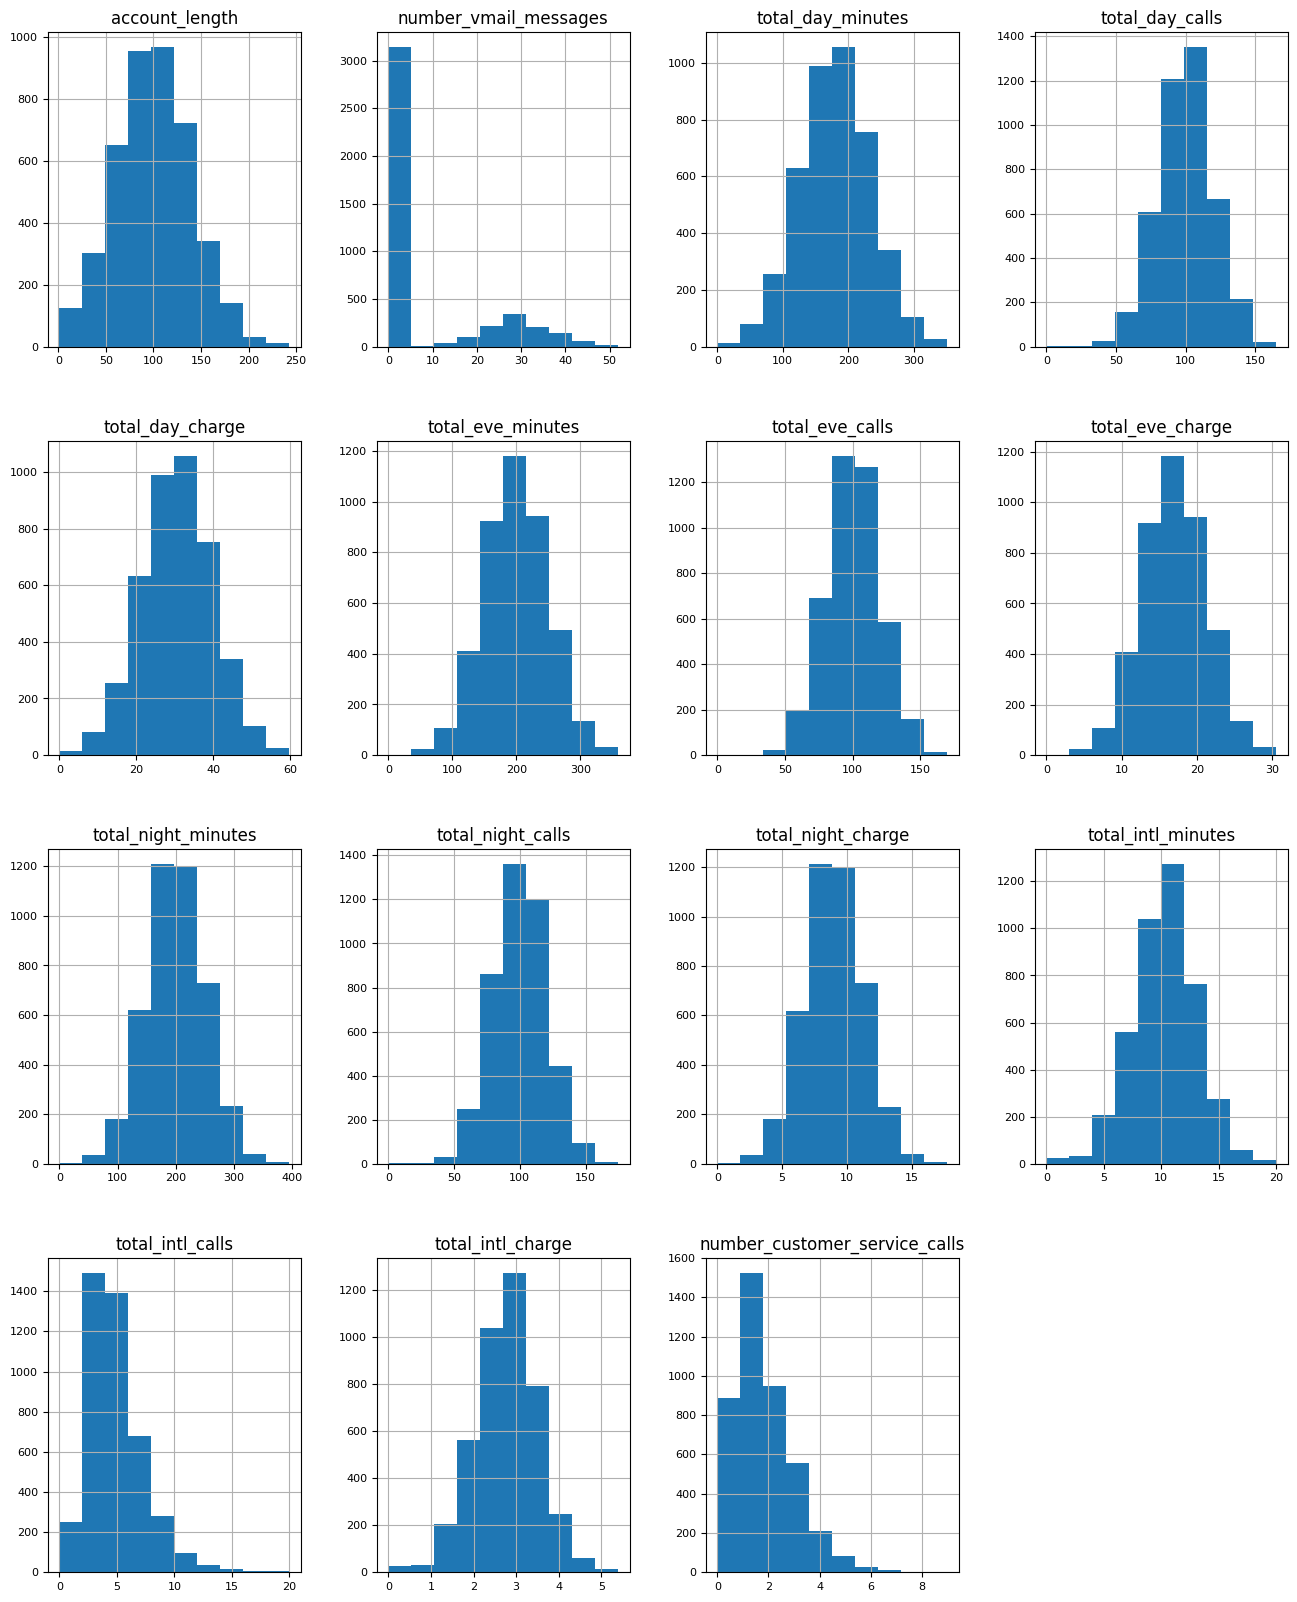

In [31]:
train_num.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8)

## Handling Outliers

In [32]:
n = 0
for col in train_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    total = len(df[col][(((df[col] < low_limit)) | (df[col] > high_limit))])
    n = n + total
    print('There are {} row data outlier in {}'.format(total, col))


There are 20 row data outlier in account_length
There are 86 row data outlier in number_vmail_messages
There are 25 row data outlier in total_day_minutes
There are 28 row data outlier in total_day_calls
There are 26 row data outlier in total_day_charge
There are 34 row data outlier in total_eve_minutes
There are 24 row data outlier in total_eve_calls
There are 34 row data outlier in total_eve_charge
There are 37 row data outlier in total_night_minutes
There are 33 row data outlier in total_night_calls
There are 37 row data outlier in total_night_charge
There are 62 row data outlier in total_intl_minutes
There are 100 row data outlier in total_intl_calls
There are 62 row data outlier in total_intl_charge
There are 335 row data outlier in number_customer_service_calls


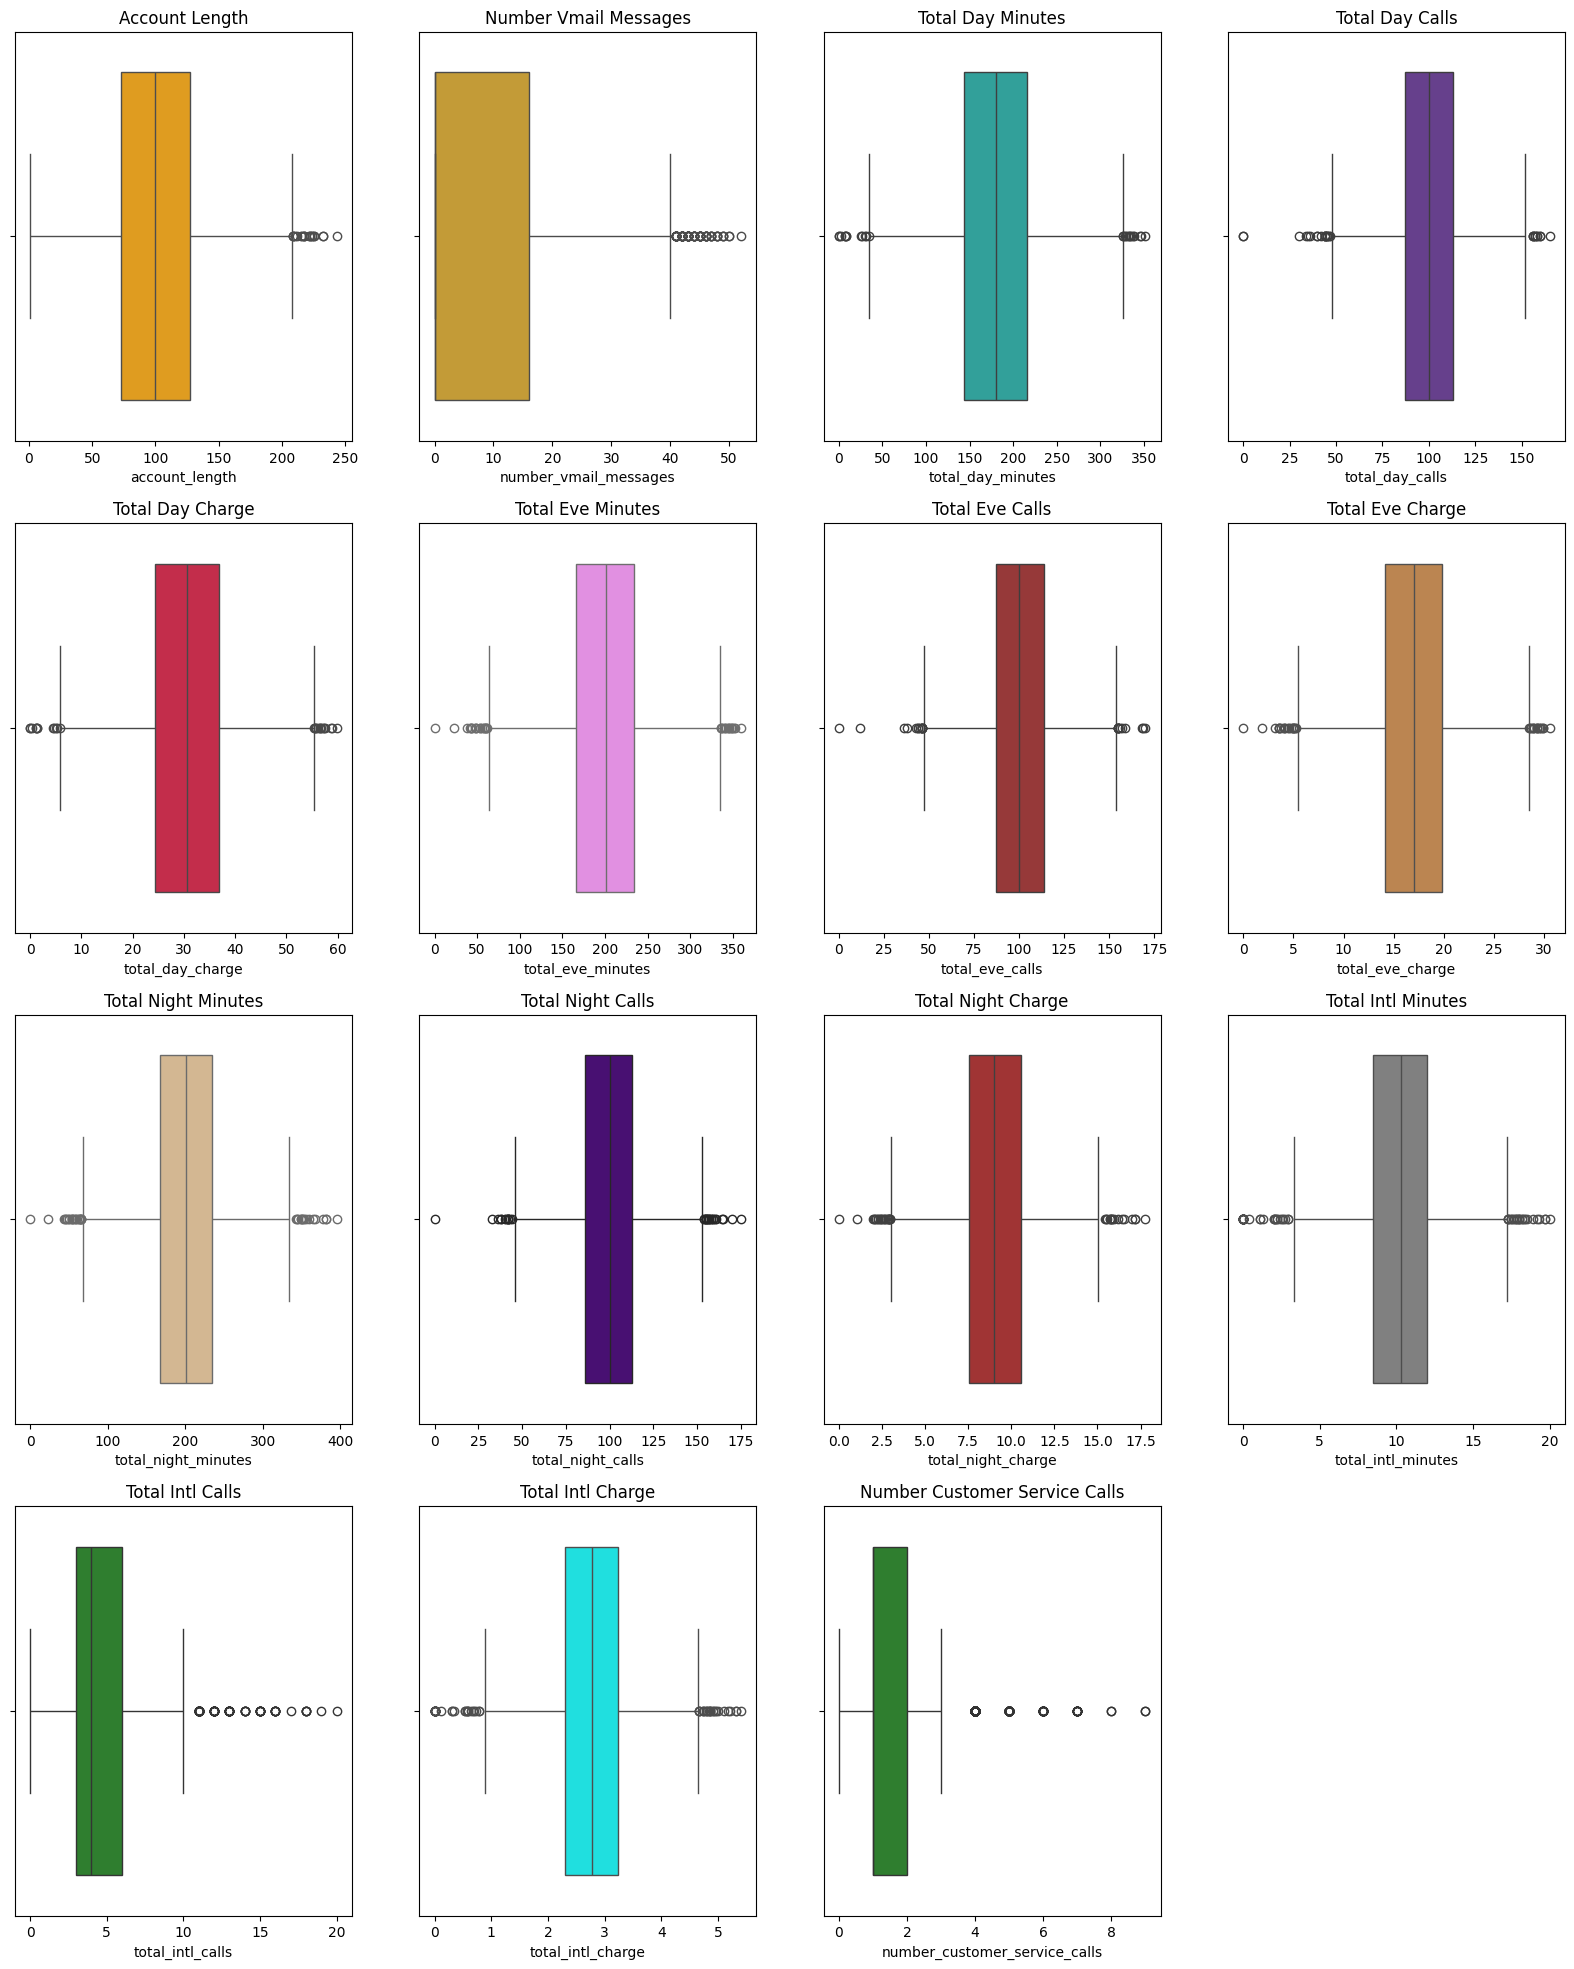

In [33]:
colour_list = ['orange','goldenrod', 'lightseagreen', 'rebeccapurple', 'crimson', 'violet', 'brown', 'peru', 'burlywood', 'indigo',
           'firebrick', 'gray', 'forestgreen', 'cyan', 'forestgreen']
fig = plt.figure(figsize=[20,50])
for i, col in enumerate(train_num):
    ax = fig.add_subplot(8,4, i+1)
    ax = sns.boxplot(data = df, x=col, color=colour_list[i])
    title = re.sub('_', ' ', col.title())
    ax.set_title(title)
    ax.set_xlabel(col)

In [34]:
n = 0
for col in train_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    df[col] = df[col].apply(lambda x: high_limit if x > high_limit else (low_limit if x < low_limit else x))
    total = len(df[col][(((df[col] < low_limit)) | (df[col] > high_limit))])
    n = n + total
    print('There are {} row data outlier in columns (variables) {}'.format(total, col))

There are 0 row data outlier in columns (variables) account_length
There are 0 row data outlier in columns (variables) number_vmail_messages
There are 0 row data outlier in columns (variables) total_day_minutes
There are 0 row data outlier in columns (variables) total_day_calls
There are 0 row data outlier in columns (variables) total_day_charge
There are 0 row data outlier in columns (variables) total_eve_minutes
There are 0 row data outlier in columns (variables) total_eve_calls
There are 0 row data outlier in columns (variables) total_eve_charge
There are 0 row data outlier in columns (variables) total_night_minutes
There are 0 row data outlier in columns (variables) total_night_calls
There are 0 row data outlier in columns (variables) total_night_charge
There are 0 row data outlier in columns (variables) total_intl_minutes
There are 0 row data outlier in columns (variables) total_intl_calls
There are 0 row data outlier in columns (variables) total_intl_charge
There are 0 row data o

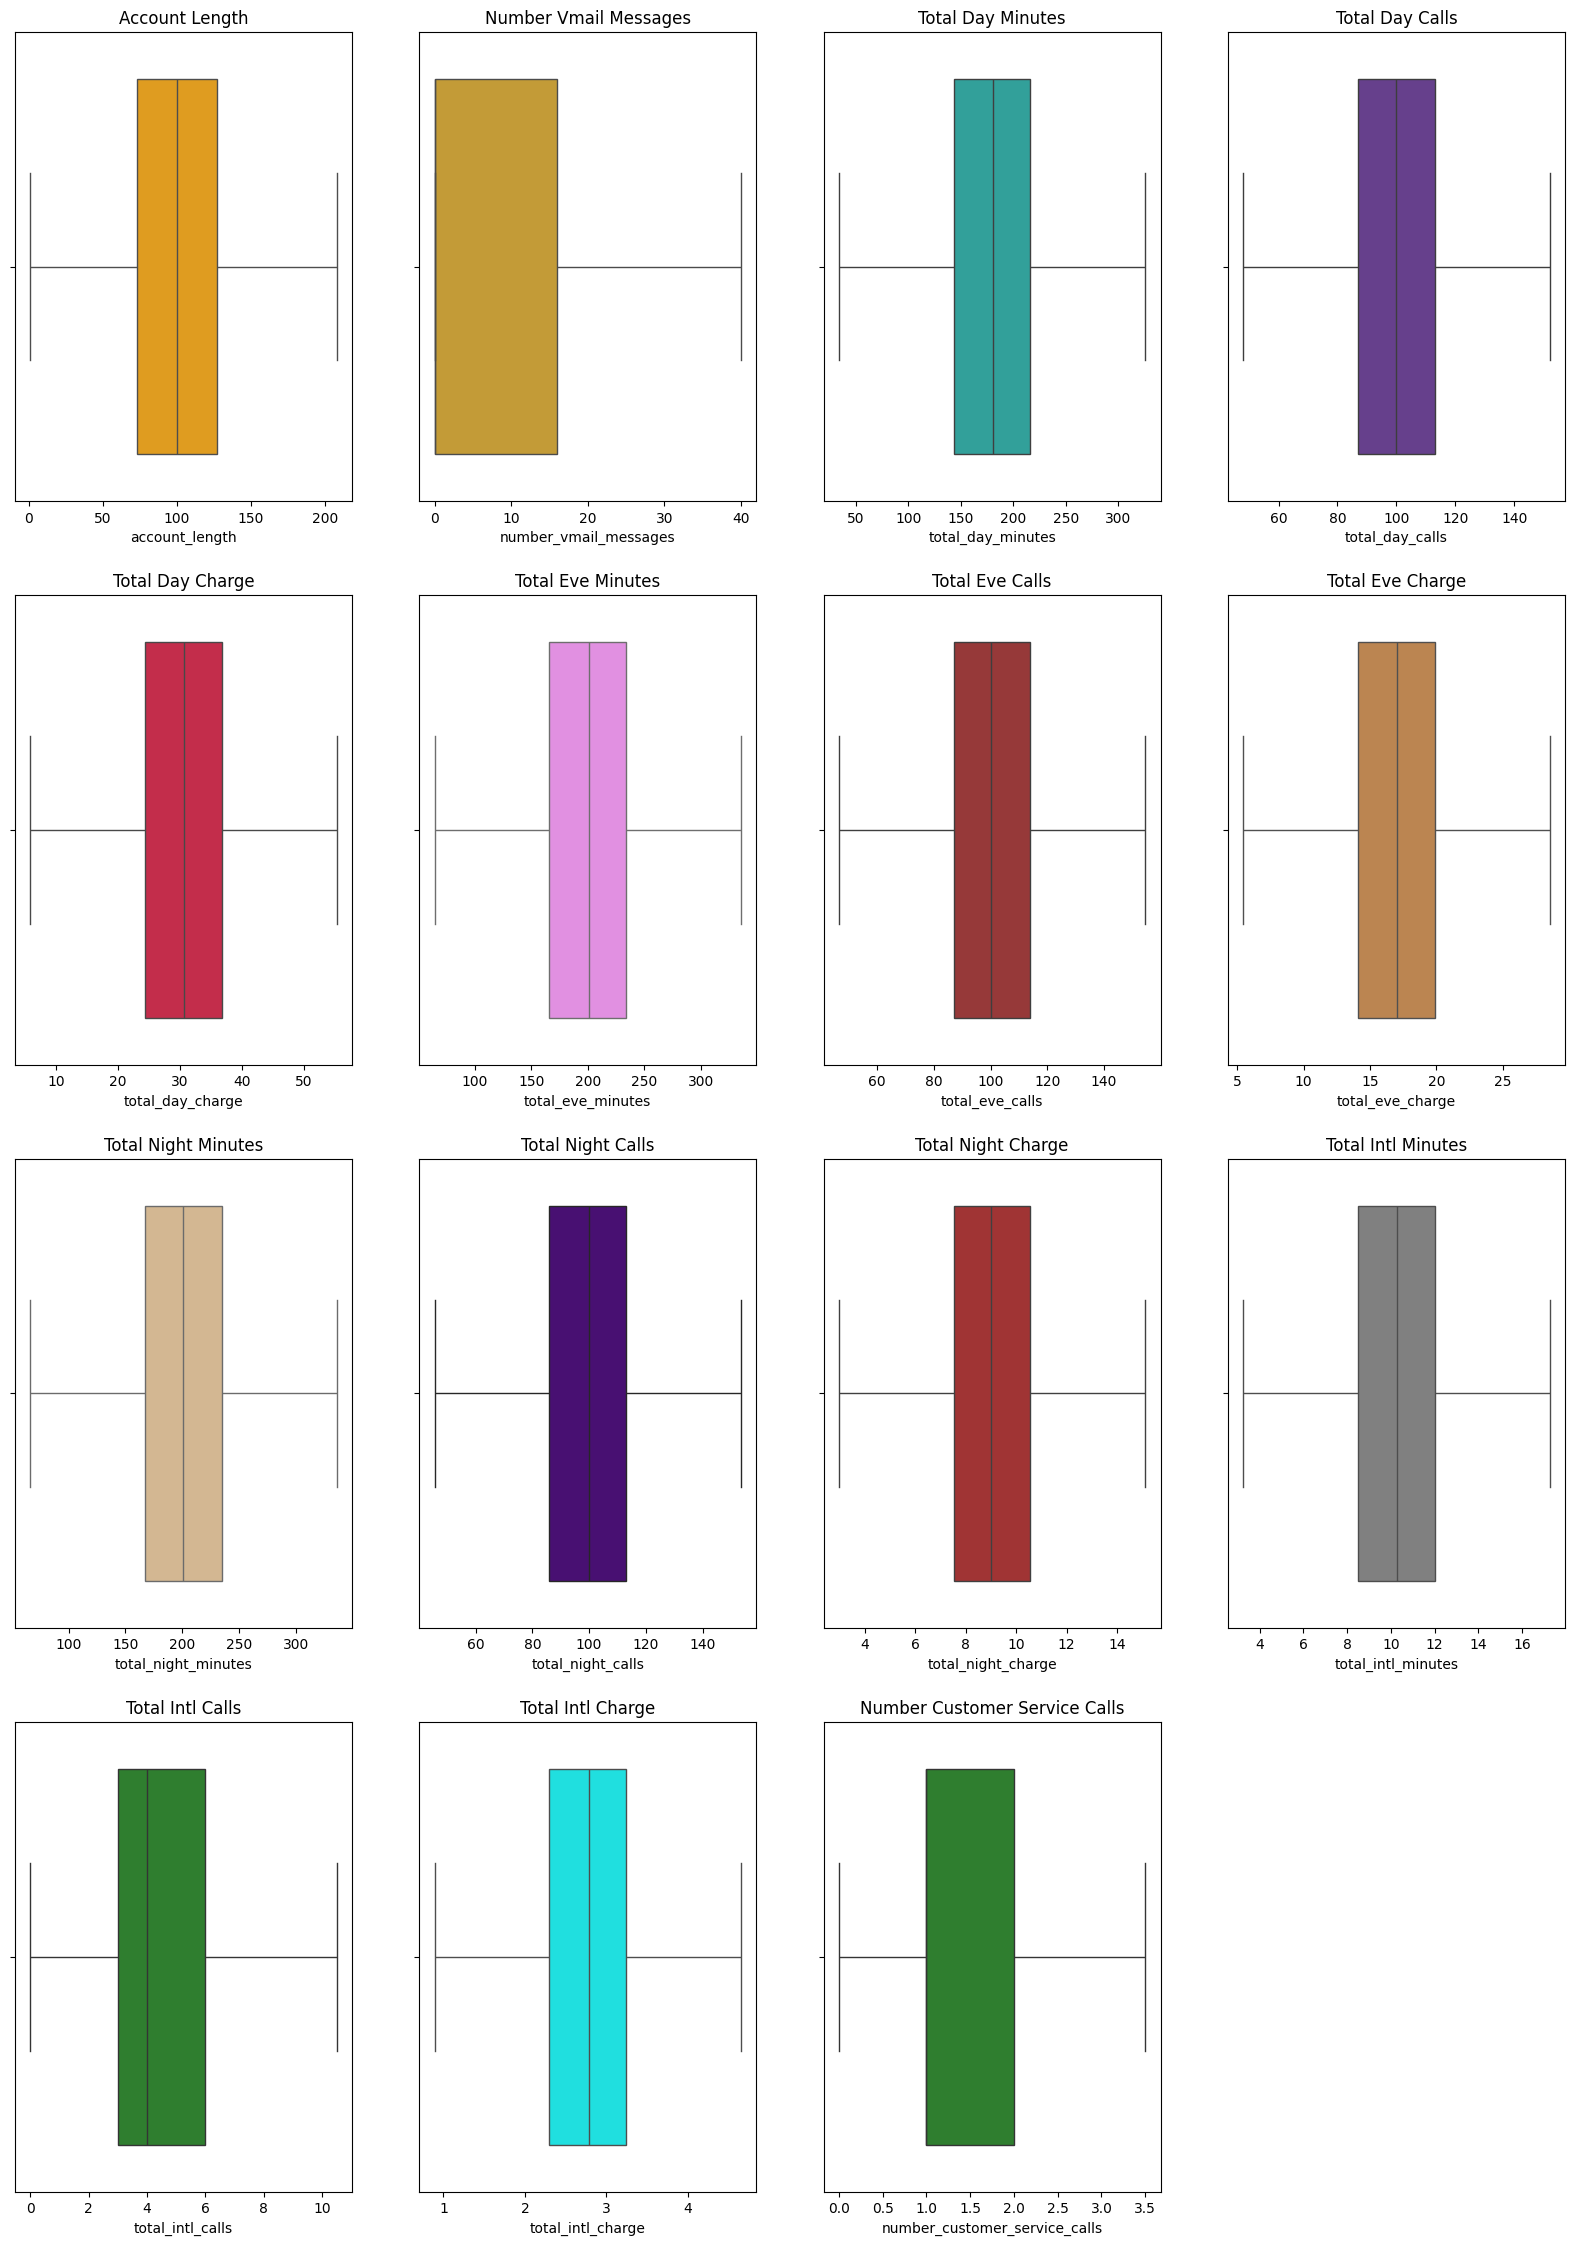

In [35]:
fig = plt.figure(figsize=[20,50])
for i ,col in enumerate(train_num):
    ax = fig.add_subplot(7,4, i+1)
    ax = sns.boxplot(data = df, x=col, color=colour_list[i])
    title = re.sub('_', ' ', col.title())
    ax.set_title(title)
    ax.set_xlabel(col)

## Feature Encoding

In [36]:
df[['international_plan', 'voice_mail_plan', 'churn']] = df[['international_plan', 'voice_mail_plan', 'churn']].replace({'yes': 1, 'no': 0})

C:\Users\Josephine\AppData\Local\Temp\ipykernel_4520\828266137.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['international_plan', 'voice_mail_plan', 'churn']] = df[['international_plan', 'voice_mail_plan', 'churn']].replace({'yes': 1, 'no': 0})


## Dimensionality Reduction

In [37]:
total_minutes = train_num['total_day_minutes'] + train_num['total_eve_minutes'] + train_num['total_night_minutes']
total_charge = train_num['total_day_charge'] + train_num['total_eve_charge'] + train_num['total_night_charge']
total_calls = train_num['total_day_calls'] + train_num['total_eve_calls'] + train_num['total_night_calls']
train_num['total_minutes'] = total_minutes
train_num['total_charge'] = total_charge
train_num['total_calls'] = total_calls

In [38]:
train_num.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
                'total_day_charge', 'total_eve_charge', 'total_night_charge',
                'total_day_calls', 'total_eve_calls', 'total_night_calls'], axis=1, inplace=True)

In [39]:
train_num.head()

,account_length,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_charge,total_calls
0,107,26,13.7,3,3.70,1,611.5,55.54,329
1,137,0,12.2,5,3.29,0,527.2,59.00,328
2,84,0,6.6,7,1.78,2,558.2,65.02,248
3,75,0,10.1,3,2.73,3,501.9,49.36,356
4,121,24,7.5,7,2.03,3,779.3,76.28,314


## Categorical Encoding

In [40]:
# One-hot encode categorical columns
categorical_cols = ['state', 'area_code']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_train = encoder.fit_transform(df[categorical_cols])
encoded_df_train = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)

## Concatenate Numerical and Encoded Columns

In [41]:
df = pd.concat([train_num, encoded_df_train, df[['international_plan',
                    'voice_mail_plan', 'churn']]], axis=1)

In [42]:
X = df.drop(['churn'], axis=1)
y = df['churn']

# Model Selection

## Train/Validation/Test Split

In [43]:
# Train/Validation/Test Split - Split X and y directly
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, shuffle=True)

## Scale and Smote

In [44]:
# Scale the data
scaler = StandardScaler()
# Fit the scaler only on the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform the validation and test data using the scaler fitted on the training data
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE only to the training data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

# Now use X_train_resampled, y_train_resampled, X_valid_scaled, y_valid, X_test_scaled, y_test
# for model training and evaluation.
# Rename for consistency with original variable names used in model training cells
X_train = X_train_resampled
y_train = y_train_resampled
X_valid = X_valid_scaled
X_test = X_test_scaled

## Hyperparameter Tuning

In [47]:
# --- k nearest neighbor ---
knn_grid = {
    'n_neighbors': list(range(1, 30, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

# --- Logistic regression ---
logreg_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['saga'],
    'max_iter': [1000]
}
grid_logreg = GridSearchCV(LogisticRegression(), logreg_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_logreg.fit(X_train, y_train)

# --- Naive bayes ---
nb_grid = {
    'var_smoothing': np.logspace(-9, -2, 8)
}
grid_nb = GridSearchCV(GaussianNB(), nb_grid, cv=5, scoring='f1', n_jobs=-1)
grid_nb.fit(X_train, y_train)

# --- Decision Tree ---
tree_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_tree.fit(X_train, y_train)

# --- Random Forest ---
rf_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# --- XGBoost ---
xgb_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10]
}
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)


C:\Users\Josephine\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Josephine\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Josephine\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10], 'n_estimators': [50, 100]},
             scoring='accuracy')

## Evaluation Helpers

In [48]:
results = []

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        y_proba = None

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f"{name} - ROC Curve")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.grid(True)
        plt.show()

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0),
        'ROC AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None
    })

# Model Evaluation

## Evaluate All Tuned Models


KNN (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1080
           1       0.36      0.29      0.32       195

    accuracy                           0.81      1275
   macro avg       0.62      0.60      0.61      1275
weighted avg       0.80      0.81      0.80      1275



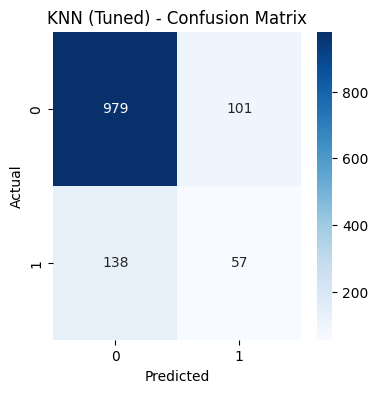

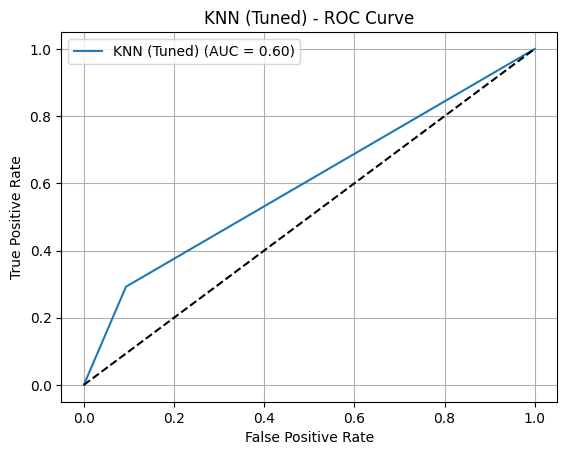


Logistic Regression (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1080
           1       0.37      0.67      0.48       195

    accuracy                           0.78      1275
   macro avg       0.65      0.73      0.67      1275
weighted avg       0.85      0.78      0.80      1275



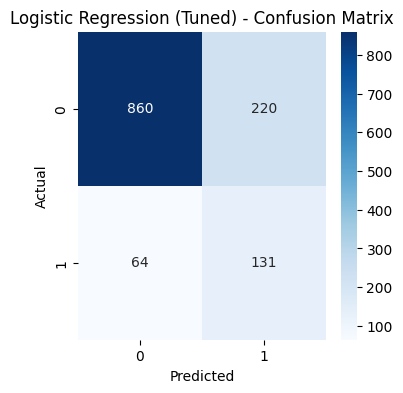

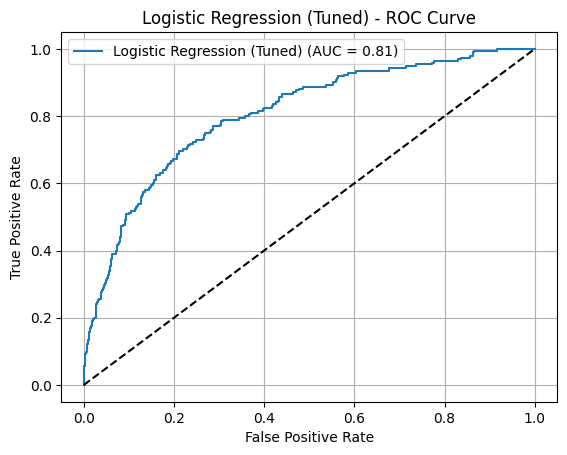


Naive Bayes (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.54      0.66      1080
           1       0.18      0.56      0.27       195

    accuracy                           0.54      1275
   macro avg       0.53      0.55      0.47      1275
weighted avg       0.77      0.54      0.60      1275



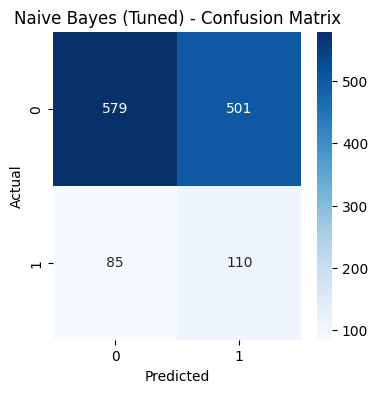

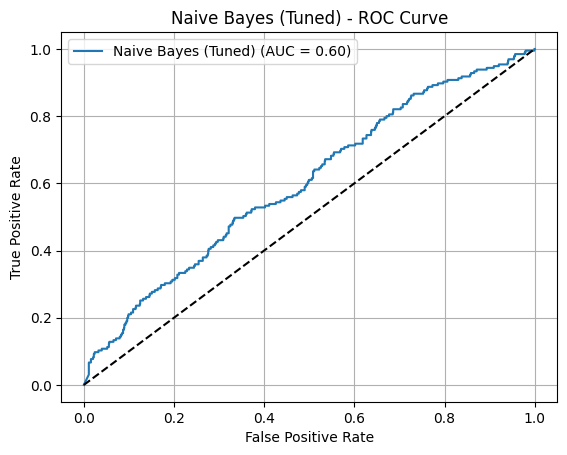


Decision Tree (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1080
           1       0.80      0.83      0.81       195

    accuracy                           0.94      1275
   macro avg       0.88      0.89      0.89      1275
weighted avg       0.94      0.94      0.94      1275



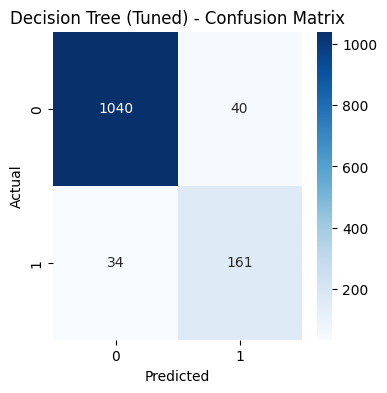

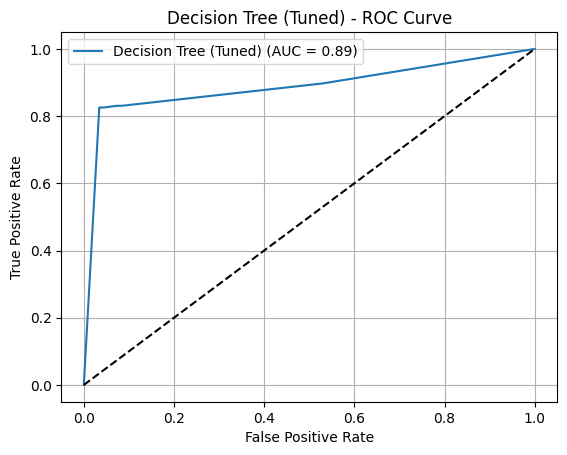


Random Forest (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1080
           1       0.81      0.75      0.78       195

    accuracy                           0.93      1275
   macro avg       0.88      0.86      0.87      1275
weighted avg       0.93      0.93      0.93      1275



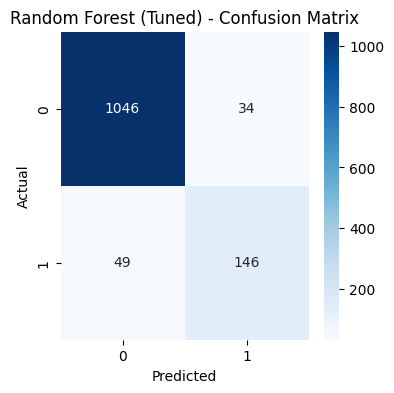

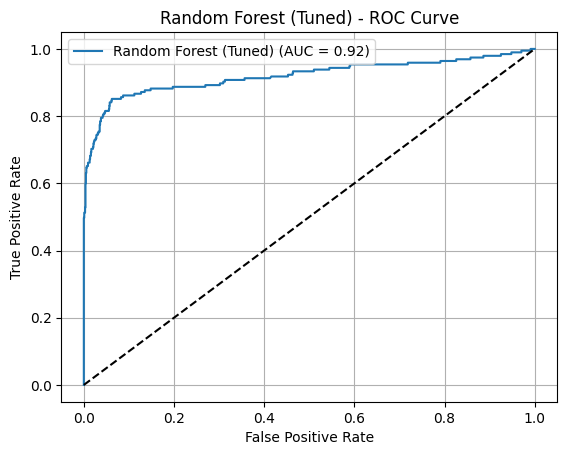


XGBoost (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1080
           1       0.93      0.86      0.89       195

    accuracy                           0.97      1275
   macro avg       0.95      0.92      0.94      1275
weighted avg       0.97      0.97      0.97      1275



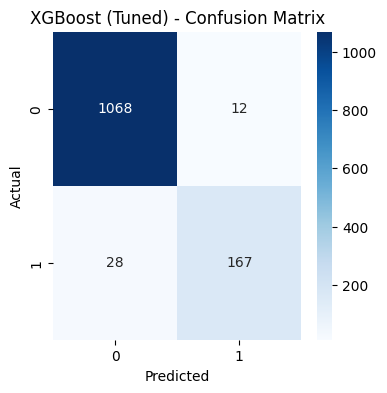

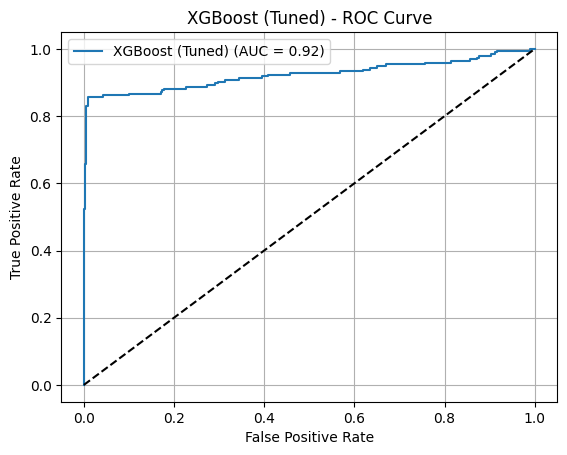

In [49]:
evaluate_model("KNN (Tuned)", grid_knn.best_estimator_, X_test, y_test)
evaluate_model("Logistic Regression (Tuned)", grid_logreg.best_estimator_, X_test, y_test)
evaluate_model("Naive Bayes (Tuned)", grid_nb.best_estimator_, X_test, y_test)
evaluate_model("Decision Tree (Tuned)", grid_tree.best_estimator_, X_test, y_test)
evaluate_model("Random Forest (Tuned)", grid_rf.best_estimator_, X_test, y_test)
evaluate_model("XGBoost (Tuned)", grid_xgb.best_estimator_, X_test, y_test)

## Results Table

In [50]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
5,XGBoost (Tuned),0.968627,0.932961,0.856410,0.893048,0.923029
3,Decision Tree (Tuned),0.941961,0.800995,0.825641,0.813131,0.886572
4,Random Forest (Tuned),0.934902,0.811111,0.748718,0.778667,0.919200
0,KNN (Tuned),0.812549,0.360759,0.292308,0.322946,0.599395
1,Logistic Regression (Tuned),0.777255,0.373219,0.671795,0.479853,0.805812
2,Naive Bayes (Tuned),0.540392,0.180033,0.564103,0.272953,0.600242


XGBoost model performed best with Accuracy of 0.993882

## Compare ROC Curves Side-by-side

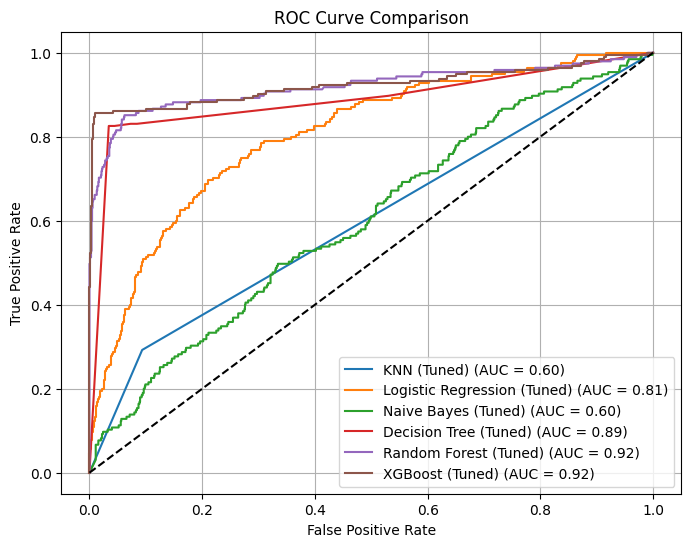

In [51]:
plt.figure(figsize=(8, 6))
for name, model in [
    ("KNN (Tuned)", grid_knn.best_estimator_),
    ("Logistic Regression (Tuned)", grid_logreg.best_estimator_),
    ("Naive Bayes (Tuned)", grid_nb.best_estimator_),
    ("Decision Tree (Tuned)", grid_tree.best_estimator_),
    ("Random Forest (Tuned)", grid_rf.best_estimator_),
    ("XGBoost (Tuned)", grid_xgb.best_estimator_)
]:
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        continue

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Prediction On Test Data

## Data Preparation of Test Data

In [52]:
df_test = pd.read_csv('test.csv')

In [53]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [54]:
df_test[['international_plan', 'voice_mail_plan']] = df_test[['international_plan', 'voice_mail_plan']].replace({'yes': 1, 'no': 0})

C:\Users\Josephine\AppData\Local\Temp\ipykernel_4520\3611960658.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test[['international_plan', 'voice_mail_plan']] = df_test[['international_plan', 'voice_mail_plan']].replace({'yes': 1, 'no': 0})


## Dimensionality Reduction of Test Data

In [55]:
test_total_minutes = df_test['total_day_minutes'] + df_test['total_eve_minutes'] + df_test['total_night_minutes']
test_total_charge = df_test['total_day_charge'] + df_test['total_eve_charge'] + df_test['total_night_charge']
test_total_calls = df_test['total_day_calls'] + df_test['total_eve_calls'] + df_test['total_night_calls']
df_test['total_minutes'] = test_total_minutes
df_test['total_charge'] = test_total_charge
df_test['total_calls'] = test_total_calls

In [56]:
df_test.drop(['id', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
                'total_day_charge', 'total_eve_charge', 'total_night_charge',
                'total_day_calls', 'total_eve_calls', 'total_night_calls'], axis=1, inplace=True)

In [57]:
df_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_charge,total_calls
0,KS,128,area_code_415,0,1,25,10.0,3,2.70,1,707.2,72.86,300
1,AL,118,area_code_510,1,0,0,6.3,6,1.70,0,647.9,65.91,317
2,IA,62,area_code_415,0,0,0,13.1,6,3.54,4,630.9,55.77,245
3,VT,93,area_code_510,0,0,0,8.1,3,2.19,3,538.5,56.80,346
4,NE,174,area_code_415,0,0,0,15.5,5,4.19,3,652.1,55.96,303


In [58]:
df_test.shape

(750, 13)

## Categorical Encoding of Test Data

In [59]:
# One-hot encode categorical columns using the encoder fitted on the training data
categorical_cols = ['state', 'area_code'] # Use the same columns
test_encoded = encoder.transform(df_test[categorical_cols]) # Use the fitted 'encoder'
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=df_test.index)


In [60]:
test_encoded_df.shape

(750, 54)

In [61]:
# Drop the original categorical columns from df_test
df_test_processed = df_test.drop(columns=categorical_cols)

## Concatenate Numerical and Encoded Columns of Test Data

In [62]:
df_test_processed = pd.concat([df_test_processed, test_encoded_df], axis=1)

In [63]:
df_test_processed.shape

(750, 65)

## Make Predictions Using the Best Performing Model

In [64]:
feature_cols_train = X.columns # X is the dataframe before scaling/smote

In [65]:
# Reindex the test data to match the training data columns and fill missing columns with 0
df_test_processed = df_test_processed.reindex(columns=feature_cols_train, fill_value=0)

In [66]:
# Scale the processed test data using the scaler fitted on the training data
X_submission = scaler.transform(df_test_processed)

In [67]:
df_test_raw = pd.read_csv("sampleSubmission.csv")
ids = df_test_raw['id']

In [68]:
# Use the best performing model, which was grid_rf.best_estimator_
preds = grid_rf.best_estimator_.predict(X_submission)

In [69]:
output = pd.DataFrame({'Id': ids,'churn': preds.squeeze()})

In [70]:
output.churn.value_counts()

churn
0    656
1     94
Name: count, dtype: int64

In [71]:
# Convert churn predictions back to 'yes'/'no' string labels as per sampleSubmission.csv
output['churn'] = output['churn'].replace({1: 'yes', 0: 'no'})

# Create Submission File

In [72]:
# Save the submission file
output.to_csv('submission.csv', index=False)

## Distribution of Predicted Customer Churn

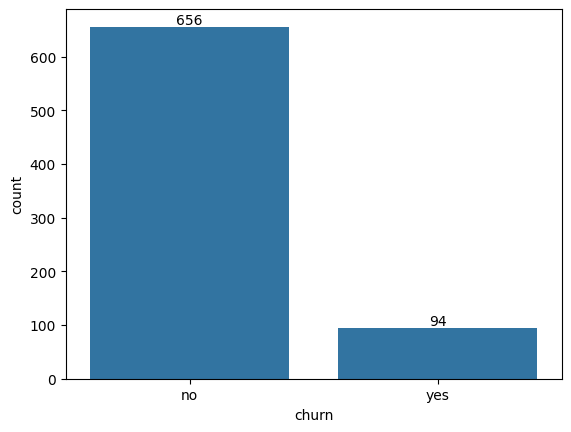

In [73]:
ax = sns.countplot(x='churn', data=output)
ax.bar_label(ax.containers[0], fontsize=10);

In [74]:
print("Submission file created successfully!")
print(output.head())

Submission file created successfully!
   Id churn
0   1    no
1   2    no
2   3    no
3   4    no
4   5    no


***Citation***

Kostas Diamantaras. Customer Churn Prediction 2020. https://kaggle.com/competitions/customer-churn-prediction-2020, 2020. Kaggle.